# DE genes in time
Differential expression of genes through time in mutants vs AX4.

In [1]:
import os
import sys
from importlib import reload

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.insert(0,module_path)

import matplotlib.pyplot as plt
import glob
import pandas as pd
import numpy as np


In [2]:
path = '/home/karin/Documents/timeTrajectories/data/deTime/de_time_impulse/'

## FDR threshold choise
Select FDR treshold bvased on found DE between AX4 sample groups (FD, PE, SE). It is expected that majority of genes between 

In [3]:
MINP = 10 ** -323.6

# Replace low p values with MINP so that they are not -inf after log transform for plotting
files = [f for f in glob.glob(path + "DE_*tsv")]
files.sort()
padj_dict = dict()
for f in files:
    data = pd.read_table(f)
    name = f.split('DE_')[1].split('_t')[0]
    padjs = data['padj'].values
    padjs[padjs < MINP] = MINP
    padj_dict[name] = data['padj'].values


In [5]:
refs = ['AX4_PE_ref_AX4_FD', 'AX4_PE_ref_AX4_SE', 'AX4_SE_ref_AX4_FD']

Text(0, 0.5, 'log10(padj)')

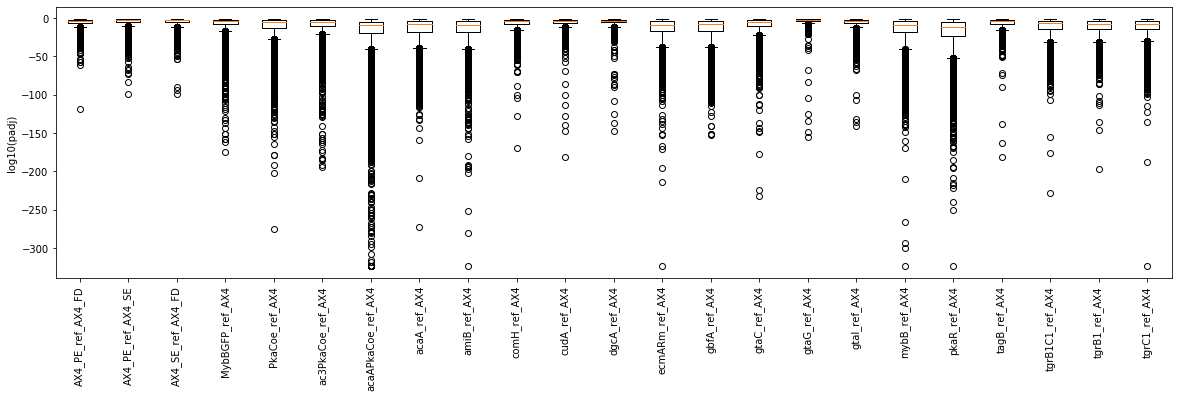

In [11]:
names = list(padj_dict.keys())
padjs = [np.log10(padj_list) for padj_list in padj_dict.values()]
fig, ax = plt.subplots(figsize=(20,5))
plt.boxplot(padjs)
ax.set_xticklabels(names, rotation=90, fontsize=10)
plt.ylabel('log10(padj)')


(-100, -1)

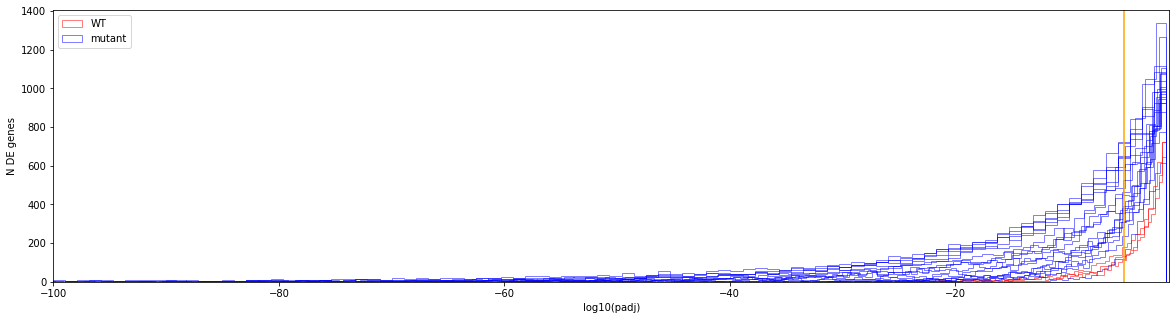

In [19]:
fig1, ax1 = plt.subplots(figsize=(20,5))
for name, padjs in padj_dict.items():
    padjs = np.log10(padjs)
    if name in refs:
        colour = 'r'
        name='WT'
    else:
        colour = 'b'
        name='mutant'
    ax1.hist(padjs, bins=300, histtype='step', fill=None, alpha=0.5,  label=name, color=colour)
ax1.legend()
handles, labels = fig1.gca().get_legend_handles_labels()
by_label =dict(zip(labels, handles))
ax1.legend(by_label.values(), by_label.keys())
ax1.set_xlabel('log10(padj)')
ax1.set_ylabel('N DE genes')
ax1.axvline(-5,color='orange')
ax1.set_xlim(left=-100,right=-1)


In [24]:
retained_n=pd.DataFrame()
for name, padjs in padj_dict.items():
    retained_n.loc[name,'N DE']=len(padjs[padjs<=10**(-5)])
retained_n.sort_values('N DE')
    

,N DE
gtaG_ref_AX4,636.0
AX4_PE_ref_AX4_SE,1251.0
AX4_SE_ref_AX4_FD,1624.0
AX4_PE_ref_AX4_FD,1738.0
dgcA_ref_AX4,1805.0
cudA_ref_AX4,2258.0
gtaI_ref_AX4,2491.0
tagB_ref_AX4,2601.0
comH_ref_AX4,3024.0
MybBGFP_ref_AX4,3101.0
